<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>


# I.  Exploratory Data Analysis with Pandas

In [ ]:
# Python Project Template

# 1. Prepare Problem
# a) Define The Business Objective
# b) Select the datasets
# c) Load dataset
# d) Load libraries

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transformation

# 4. Modeling Strategy
# a) Select Suitable Algorithms
# b) Select Training/Testing Approaches
# c) Train 

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use


### Article outline
1. Demonstration of main Pandas methods
2. First attempt on predicting telecom churn
3. Useful resources

### 1. Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [2]:
Bchurn = pd.read_csv('Churn_Modelling.csv')

In [4]:
Bchurn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
Bchurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
Bchurn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

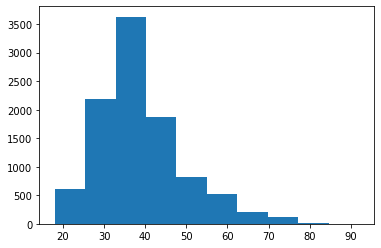

In [15]:
plt.hist(Bchurn['Age'])

In [12]:
Bchurn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76480.845853,1.530200,0.70550,0.515100,100097.142011,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62393.400859,0.581654,0.45584,0.499797,57503.828496,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51014.837500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127638.027500,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` looks worse.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, features names, and feature types.

In [ ]:
print(Bchurn.shape)

From the output, we can see that the table contains 3333 rows and 20 columns.

Now let’s try printing out column names using `columns`:

In [ ]:
print(Bchurn.columns)

We can use the `info()` method to output some general information about the dataframe: 

In [ ]:
print(Bchurn.info())

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let’s apply this method to the `Churn` feature to convert it into `int64`:


In [ ]:
# df['Churn'] = df['Churn'].astype('int64')

In [ ]:
# Number of rows
len(Bchurn)  # for traceability 576 rows imported


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
Bchurn.describe()  # Similar to summary() in R

In [ ]:
Bchurn.describe().transpose()  # change the rows and columns

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [ ]:
Bchurn.describe(include=['object', 'bool'])

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `Churn`:

In [ ]:
Bchurn['Churned'].value_counts()

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [ ]:
Bchurn['Churned'].value_counts(normalize=True)


### Indexing and retrieving data

DataFrame can be indexed in different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**



In [ ]:
Bchurn['Churned'].mean()


14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let’s use it to answer the question:

**What are average values of numerical features for churned users?**


In [ ]:
Bchurn[Bchurn['Churned'] == 1].mean()


DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case, we would say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*, and, in the second case, we would say *"give us the values of the first five rows in the first three columns"* (as in typical Python slice: the maximal value is not included).


In [ ]:
Bchurn.loc[0:5, 'Geography':'Age']

In [ ]:
Bchurn.iloc[0:5, 0:3]

If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [ ]:
Bchurn[-1:]


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [ ]:
Bchurn.apply(np.max) 

## II. Visual data analysis in Python


In the field of Machine Learning, *data visualization* is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools.

Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.

All in all, visualization is a relatively fast way to learn something new about your data. Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox.

We are going to get hands-on experience with visual exploration of data using popular libraries such as `matplotlib` and `seaborn`.

### Article outline

1. Dataset
2. Univariate visualization
    * 2.1 Quantitative features
    * 2.2 Categorical and binary features
3. Multivariate visualization
    * 3.1 Quantitative–Quantitative
    * 3.2 Quantitative–Categorical
    * 3.3 Categorical–Categorical
4. Whole dataset
    * 4.1 Naive approach
    * 4.2 Dimensionality reduction
    * 4.2 t-SNE
5. Useful resources

In [ ]:
import numpy as np
import pandas as pd

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

### 1. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 1.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

In [ ]:
features = ['Balance', 'Tenure']
Bchurn[features].hist(figsize=(10, 4));

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

In [ ]:
Bchurn[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays both the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

In [ ]:
# increasing the width of the Chart
plt.rcParams['figure.figsize'] = 10,6 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
vis1 = sns.distplot(Bchurn["Age"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
sns.distplot(Bchurn['Age']);

In [ ]:
# increasing the width of the Chart
plt.rcParams['figure.figsize'] = 10,6 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
vis1 = sns.distplot(Bchurn["EstimatedSalary"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
# Boxplots
# Horizontal boxplot with observations

plot2 =sns.boxplot(Bchurn['Age'])

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

##### Box plot

Another useful type of visualization is a *box plot*. `seaborn` does a great job here:

In [ ]:
sns.boxplot(x='Age', data=Bchurn, orient = 'v');

##### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) of a `DataFrame`:

In [ ]:
df[features].describe()

Its output is mostly self-explanatory. *25%*, *50%* and *75%* are the corresponding [percentiles](https://en.wikipedia.org/wiki/Percentile).

#### 1.2 Categorical and binary features

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### Frequency table

Let’s check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [ ]:
Bchurn['Churned'].value_counts()

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionaly penalize our model errors in predicting the minority "Churn" class.

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churned', data=df, ax=axes[0]);
sns.countplot(x='Age', data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

### 2. Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 2.1 Quantitative–Quantitative

##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

In [ ]:
# Drop non-numerical variables
numerical = list(set(Bchurn.columns) - 
                 set(['RowNumber', 'CustomerId', 'Gender', 'Surname','Geography']))

# Calculate Correlation
corr_matrix = Bchurn[numerical].corr()
corr_matrix


In [ ]:
# Plot correlation
sns.heatmap(corr_matrix);

In [ ]:
# Correlation Matrix Plot

import seaborn

plt.rcParams['figure.figsize'] = 20,10  # control plot size

correlations = Bchurn.corr()
seaborn.heatmap(correlations)
plt.show()

In [ ]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,10  # control plot size
Bchurn.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False)
plt.show()


In [ ]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 20,10  # control plot size

Bchurn.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()


In [ ]:
# Univariate Histograms
plt.rcParams['figure.figsize'] = 20,10  # control plot size

Bchurn.hist()
plt.show()


In [ ]:
# Scatterplot Matrix
plt.rcParams['figure.figsize'] = 20,10  # control plot size

seaborn.pairplot(Bchurn)
plt.show()


##### Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:

In [ ]:
plt.scatter(df['Balance'], df['EstimatedSalary']);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellpise-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

In [ ]:
sns.jointplot(x='Balance', y='EstimatedSalary', 
              data=df, kind='scatter');

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

In [ ]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

In [ ]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

# III- Data Preparation

In [ ]:
# Convert data types

print(Bchurn.dtypes)
# Bchurn = Bchurn.astype(float)
# print(Bchurn.dtypes)


In [ ]:
# Delete a column
'''Bchurn.drop('Code', axis=1, inplace=True)
print(Bchurn.shape)
Bchurn.head(10)'''

In [ ]:
# Delete rows with NaN values

'''print(Bchurn.shape)
Bchurn[['Bare-Nuclei']] = Bchurn[['Bare-Nuclei']].replace('?', numpy.NaN)
Bchurn.dropna(axis=0, how='any', inplace=True)
print(data2.shape)'''


In [ ]:
# Mark value as NaN

'''print(pd.unique(Bchurn['Bare-Nuclei']))
Bchurn[['Bare-Nuclei']] = Bchurn[['Bare-Nuclei']].replace('?', numpy.NaN)
print(pandas.unique(dataset['Bare-Nuclei']))'''


## Data Feature Selection

In [ ]:
'''# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
'''

In [ ]:
'''# Identify Features with Low Variance
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# load data
array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
# feature selection
threshold = 0.8 * (1 - 0.8)
test = VarianceThreshold(threshold)
fit = test.fit(X)
print(fit.variances_)
features = fit.transform(X)
print(features)
'''

In [ ]:
'''# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)
'''

In [ ]:
'''# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print ()"Num Features: %d" % fit.n_features_
print("Selected Features: %s") % fit.support_)
print("Feature Ranking: %s") % fit.ranking_
'''

In [ ]:
'''# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

'''

## Data Preparation

In [ ]:
'''# binarization
from sklearn.preprocessing import Binarizer
import pandas
import numpy

array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])'''

In [ ]:
'''# Box-Cox transform
import pandas
from scipy.stats import boxcox

array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
X_boxcox = boxcox(1+X[:,2])[0]

print(X_boxcox)
'''

In [ ]:
'''# Convert a string class label to an integer
import pandas
from sklearn.preprocessing import LabelEncoder

array = Bchurn.values

y = array[:, 60]
encoder = LabelEncoder()
encoder.fit(y)
print(encoder.classes_)
encoded_y = encoder.transform(y)
print(encoded_y)
'''

In [ ]:
'''# Impute missing values with mean attribute values
from sklearn import preprocessing
from sklearn.preprocessing import Imputer


array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]

X[X == 0] = numpy.nan
imputer = Imputer(missing_values='NaN', strategy='mean')
imputedX = imputer.fit_transform(X)
print(imputedX)
'''

In [ ]:
''''# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])
''''

In [ ]:
'''# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
'''

In [ ]:
'''# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
'''